# Árboles y Bosques de Decisión en Python

### Update Julio 2025

Este notebook proporciona una introducción práctica a los árboles de decisión y los bosques de decisión (Random Forests), utilizando el conjunto de datos disponibles en fuentes públicas.

## 1. Decision tree

* Un **árbol de decisión** es un modelo de **aprendizaje supervisado** que se utiliza para clasificación  ó  regresión.


* En términos simples, la idea es **crear un modelo que prediga el valor de una variable objetivo**; aprendiendo reglas de decisión simples inferidas a partir de las características de los datos.


### 1.1 Componentes de un árbol de decisión:

Los árboles de decisión aprenden de los datos generando reglas de tipo "if-else" y divisiones conocidas como nodos ramas u hojas del árbol. 

Cada nodo representa una pregunta sobre los datos y cada rama del árbol representa una respuesta a esa pregunta. 

El proceso continúa hasta que se llega a una hoja del árbol, que representa la predicción final.

* Cada **nodo** que no es hoja del árbol  denota una prueba de un atributo;


* Cada **rama** representa el resultado de una prueba;


* y cada nodo hoja (o terminal) tiene una **etiqueta de clase**.

**El algoritmo comienza en el nodo raíz (el nodo superior del árbol)** --en ese sentido, es un proceso jerárquico--, prueba los atributos seleccionados en los nodos intermedios (internos) y genera ramas de acuerdo con el resultado de las pruebas. Luego, guarda las etiquetas de clase en los nodos hoja como decisión.

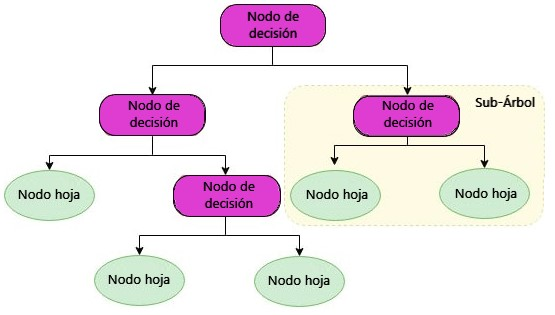

**Ejemplo** Árbol de decisión para clasificar un animal

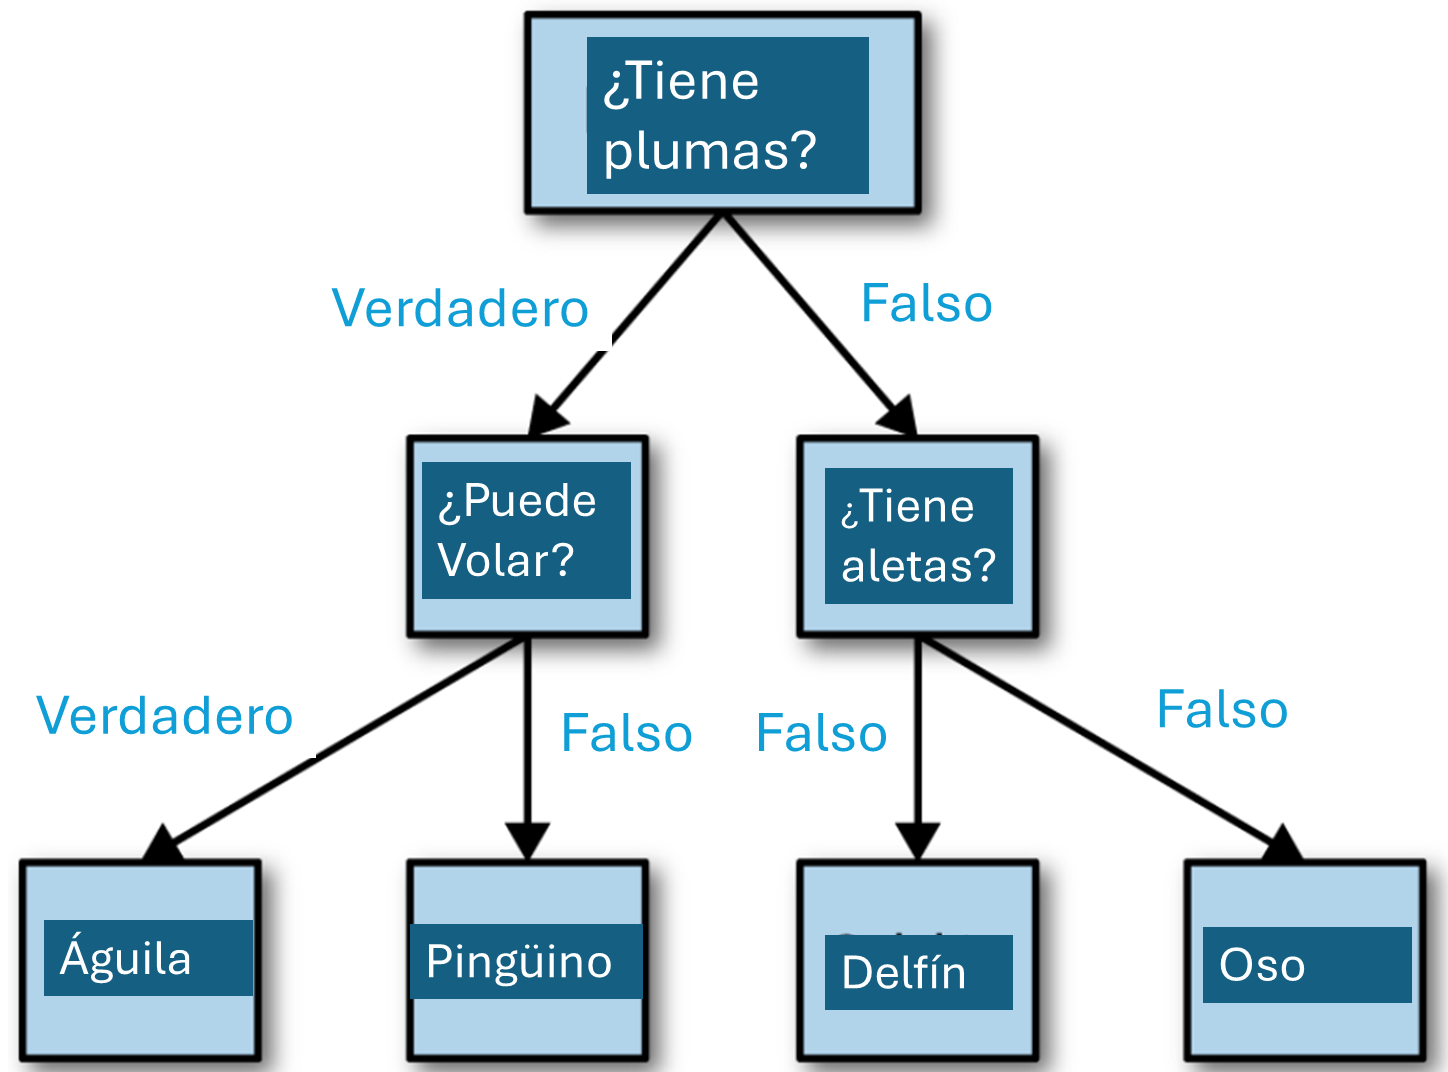

### 1.2 Proceso de construcción del árbol de decisión

1. ***Selección de características:***

Seleccione una de las características de los datos de entrenamiento como estándar dividido del nodo actual (los diferentes estándares distinguen diferentes algoritmos de árboles de decisión).

2. ***Generación de árboles de decisión:***

Genere subnodos de arriba hacia abajo según la característica seleccionada y deténgase hasta que el conjunto de datos ya no se pueda dividir.

3. ***Poda/Pruning***

El árbol de decisión puede fácilmente sobreajustarse a menos que se realice la poda necesaria (incluida la poda previa y posterior) para reducir el tamaño del árbol y optimizar su estructura de nodos.


***Un árbol de decisión necesita atributos de características y una estructura de árbol adecuada***.


 El paso clave en la construcción de un árbol de decisión es dividir los datos de todos los atributos de las características, comparar los conjuntos de resultados en términos de pureza y seleccionar el atributo con la mayor pureza como el punto de datos para la división del conjunto de datos.


 La pureza se mide principalmente a través de la entropía de la información y el coeficiente de Gini. La fórmula es la siguiente:
 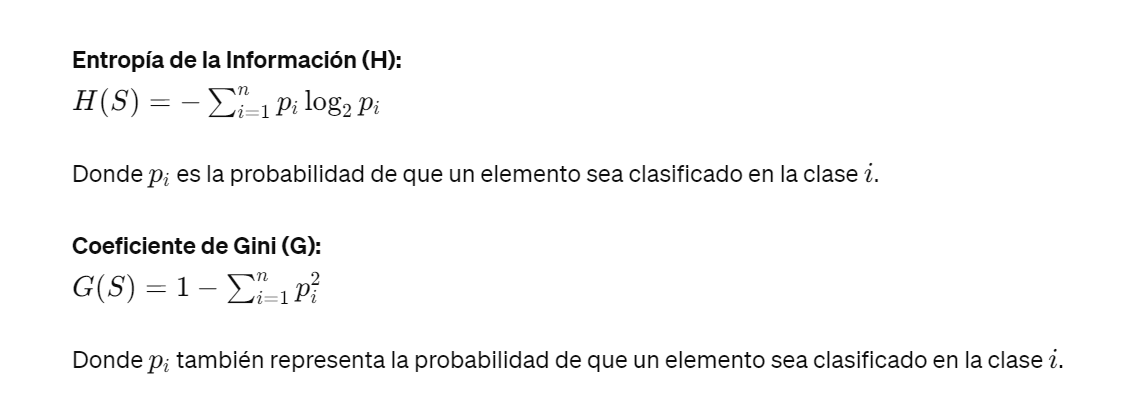







* La entropía de la información es una métrica que mide la impureza o la incertidumbre en un conjunto de datos; un valor más alto indica una mayor desorganización y una mezcla más diversa de clases.


* Por otro lado, el coeficiente de Gini es una medida de dispersión estadística y se utiliza para representar la probabilidad de que una decisión aleatoria sea incorrecta. En el contexto de los árboles de decisión, un coeficiente de Gini bajo indica que estamos haciendo un buen trabajo al dividir las clases entre diferentes nodos del árbol.


* Cuando construimos un árbol de decisión, iterativamente dividimos el conjunto de datos basándonos en estas métricas hasta que todos los datos en un nodo tengan la misma clase o hasta que se alcance un criterio de parada predefinido, como una profundidad máxima del árbol o un mínimo número de muestras en un nodo.

### 1.3 Aplicaciones de los Árboles de Decisión

Los árboles de decisión son populares por varias razones, principalmente porque son intuitivos y fáciles de interpretar.

Algunas de sus aplicaciones incluyen:


* **Diagnóstico médico**: Ayudar a diagnosticar condiciones médicas basadas en síntomas y pruebas de los pacientes.


* **Crédito bancario**: Evaluar si un solicitante es apto para un crédito basado en su historial financiero.


* **Gestión de riesgos**: Identificar los factores de riesgo de los proyectos y tomar decisiones informadas para mitigarlos.


* **Marketing dirigido**: Identificar grupos de clientes basados en sus características para campañas de marketing personalizadas.


* **Detección de fraudes**: Identificar transacciones sospechosas que puedan indicar fraude.


**Los árboles de decisión son también la base para modelos más complejos y poderosos como los bosques aleatorios (Random Forests), que combinan múltiples árboles para mejorar la precisión y la estabilidad del modelo.**

# Práctica árboles de decisión

Utilizaremos   **Scikit-Learn**, una biblioteca de aprendizaje automático de código abierto en Python.

## Instalación de Paquetes

Antes de comenzar, asegúrate de tener los paquetes necesarios instalados. Ejecuta esta celda si es necesario.

```bash
!pip install numpy pandas scikit-learn matplotlib
```


In [1]:
#!pip install numpy pandas scikit-learn matplotlib

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

#sns.set(context='notebook')

#
import warnings
warnings.filterwarnings('ignore')

**Vamos a utilizar el conjunto de datos denominado Titanic, con información de los pasajeros del barco**



In [3]:
#

titanic = pd.read_csv( 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv', 
                       sep = ',' )

titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


**Etiquetas de los datos, o atributos**

El conjunto de datos Titanic de CS109 contiene 887 filas y 8 columnas.

* **Survived (Sobrevivió)**: indica si el pasajero sobrevivió al hundimiento del Titanic (0 = No, 1 = Sí).

* **Pclass (Clase de pasajero):** indica la clase del pasajero (1 = 1ª clase, 2 = 2ª clase, 3 = 3ª clase).

* **Name (Nombre):** el nombre completo del pasajero.

* **Sex (Género):** el género del pasajero (Masculino o Femenino).

* **Age (Edad):** la edad del pasajero en años.

* **Siblings/Spouses Aboard (Hermanos/Cónyuges a bordo):** el número de hermanos/cónyuges del pasajero que también estaban a bordo del Titanic.

* **Parents/Children Aboard (Padres/Hijos a bordo):** el número de padres/hijos del pasajero que también estaban a bordo del Titanic.

* **Fare (Tarifa):** la tarifa pagada por el pasajero por su viaje en el Titanic.


In [4]:
# Visualizamos los tipos de datos

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


**Realizamos varias operaciones de limpieza**

In [5]:
# Eliminamos las columnas que no nos interesan

titanic.drop(
    ['Name', 'Fare'],
    axis = 1,
    inplace = True
)

titanic

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0
...,...,...,...,...,...,...
882,0,2,male,27.0,0,0
883,1,1,female,19.0,0,0
884,0,3,female,7.0,1,2
885,1,1,male,26.0,0,0


In [6]:
#Renombramos las columnas Siblings/Spouses Aboard y Parents/Children Aboard por SibSp y ParCh

titanic.columns = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'ParCh']

titanic.head()

,Survived,Pclass,Sex,Age,SibSp,ParCh
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [7]:
# Cambiamos los tipos de datos de Sex

titanic = pd.get_dummies( titanic, columns = ['Sex'], drop_first = True )

titanic

,Survived,Pclass,Age,SibSp,ParCh,Sex_male
0,0,3,22.0,1,0,True
1,1,1,38.0,1,0,False
2,1,3,26.0,0,0,False
3,1,1,35.0,1,0,False
4,0,3,35.0,0,0,True
...,...,...,...,...,...,...
882,0,2,27.0,0,0,True
883,1,1,19.0,0,0,False
884,0,3,7.0,1,2,False
885,1,1,26.0,0,0,True


In [8]:
# Renombramos columna Sex_male a Sex

titanic.rename( columns = {'Sex_male':'Sex'}, inplace = True )

titanic

,Survived,Pclass,Age,SibSp,ParCh,Sex
0,0,3,22.0,1,0,True
1,1,1,38.0,1,0,False
2,1,3,26.0,0,0,False
3,1,1,35.0,1,0,False
4,0,3,35.0,0,0,True
...,...,...,...,...,...,...
882,0,2,27.0,0,0,True
883,1,1,19.0,0,0,False
884,0,3,7.0,1,2,False
885,1,1,26.0,0,0,True


In [9]:
#
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  887 non-null    int64  
 1   Pclass    887 non-null    int64  
 2   Age       887 non-null    float64
 3   SibSp     887 non-null    int64  
 4   ParCh     887 non-null    int64  
 5   Sex       887 non-null    bool   
dtypes: bool(1), float64(1), int64(4)
memory usage: 35.6 KB


In [10]:
#Ordenar colummas por nombres

titanic = titanic[['Survived','Pclass','Sex','Age','SibSp','ParCh']]

titanic

,Survived,Pclass,Sex,Age,SibSp,ParCh
0,0,3,True,22.0,1,0
1,1,1,False,38.0,1,0
2,1,3,False,26.0,0,0
3,1,1,False,35.0,1,0
4,0,3,True,35.0,0,0
...,...,...,...,...,...,...
882,0,2,True,27.0,0,0
883,1,1,False,19.0,0,0
884,0,3,False,7.0,1,2
885,1,1,True,26.0,0,0


**Exploramos nuestra variable objetivo, en este caso queremos clasificar la supervivencia de los pasajeros**

In [11]:
#

titanic.Survived.value_counts( normalize = True )

Survived
0    0.614431
1    0.385569
Name: proportion, dtype: float64

In [12]:
#!pip install imblearn

In [13]:
# importamos libreria para balancear los datos

from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(random_state=42)

In [14]:
# Separamos en X e y

X_titanic = titanic.drop('Survived', axis=1)
y_titanic = titanic.Survived

In [15]:
# Balanceamos los datos
X_over_titanic, y_over_titanic  = undersample.fit_resample( X_titanic, y_titanic )

y_over_titanic.value_counts( normalize = True )

Survived
0    0.5
1    0.5
Name: proportion, dtype: float64

In [16]:
# Importamos las librerias para dividir el dataset
from sklearn.model_selection import train_test_split

In [17]:
# Dividimos nuestros datos en muestras para entrenar y probar 30% para test y 70% para train

X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split( X_over_titanic,
                                                                                     y_over_titanic, 
                                                                                     test_size = 0.30, 
                                                                                     random_state = 42 )

In [18]:
# Importamos las librerias para la creacion del modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [19]:
# Definir el clasificador y los valores de los hiperparámetros a probar
clf = DecisionTreeClassifier( random_state = 42 )
param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5]}

In [20]:
# Realizar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV( clf, 
                            param_grid = param_grid, 
                            cv = 10, 
                            return_train_score = True )

grid_search.fit(X_train_titanic, y_train_titanic)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5]},
             return_train_score=True)

In [21]:
# Imprimir los resultados

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("Mejor puntuación de validación cruzada:")
print(grid_search.best_score_)

Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': 4}
Mejor puntuación de validación cruzada:
0.7908687943262411


In [22]:
# Modelo decision tree con parametros optimizados

best_clf = grid_search.best_estimator_

In [23]:
# Predecimos Y

y_train_pred_titanic = best_clf.predict(X_train_titanic)
y_test_pred_titanic = best_clf.predict(X_test_titanic)


**Evaluamos el modelo**




In [24]:
# Graficamos matriz de confusion
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

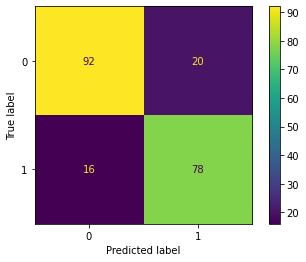

In [25]:
#
cm = confusion_matrix( y_test_titanic,
                       y_test_pred_titanic,
                       labels = best_clf.classes_ )

ConfusionMatrixDisplay(cm, display_labels = best_clf.classes_).plot()

plt.show()

In [26]:
# Calculo de las predicciones en Train y test

y_train_pred = best_clf.predict(X_train_titanic)
y_test_pred = best_clf.predict(X_test_titanic)

In [27]:
#
from sklearn.metrics import accuracy_score

In [28]:
#
print('El accuracy en train es:', accuracy_score( y_train_titanic,
                                                  y_train_pred_titanic ))
print('El accuracy en test es:', accuracy_score( y_test_titanic,
                                                 y_test_pred_titanic ))

El accuracy en train es: 0.8179916317991632
El accuracy en test es: 0.8252427184466019


In [29]:
#
from sklearn import tree

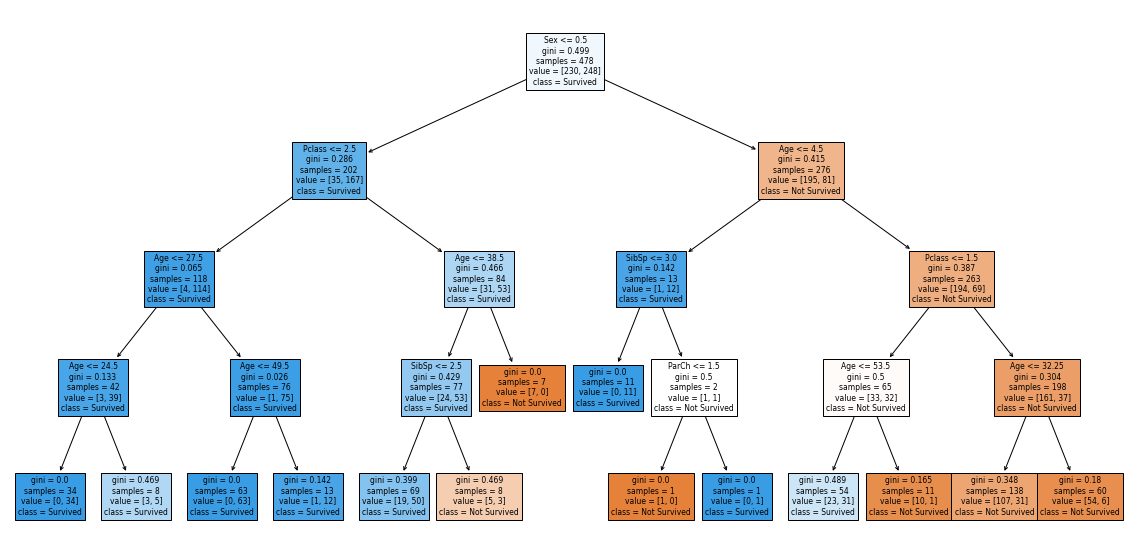

In [30]:
# Asumiendo que 'best_clf' es tu modelo y 'X_train_titanic' tus datos de entrenamiento
best_clf.fit( X_train_titanic, y_train_titanic )

plt.figure( figsize = (20, 10) )  # Esto ajusta el tamaño de la figura para una mejor visualización

tree.plot_tree( best_clf,
                feature_names = X_train_titanic.columns,  
                class_names = ['Not Survived', 'Survived'],  
                filled = True )  # Esto colorea los nodos para hacer más fácil la interpretación

plt.show()

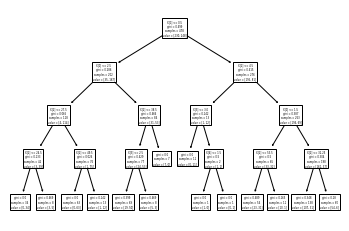

In [31]:
#
tree.plot_tree(best_clf.fit(X_train_titanic, y_train_titanic));

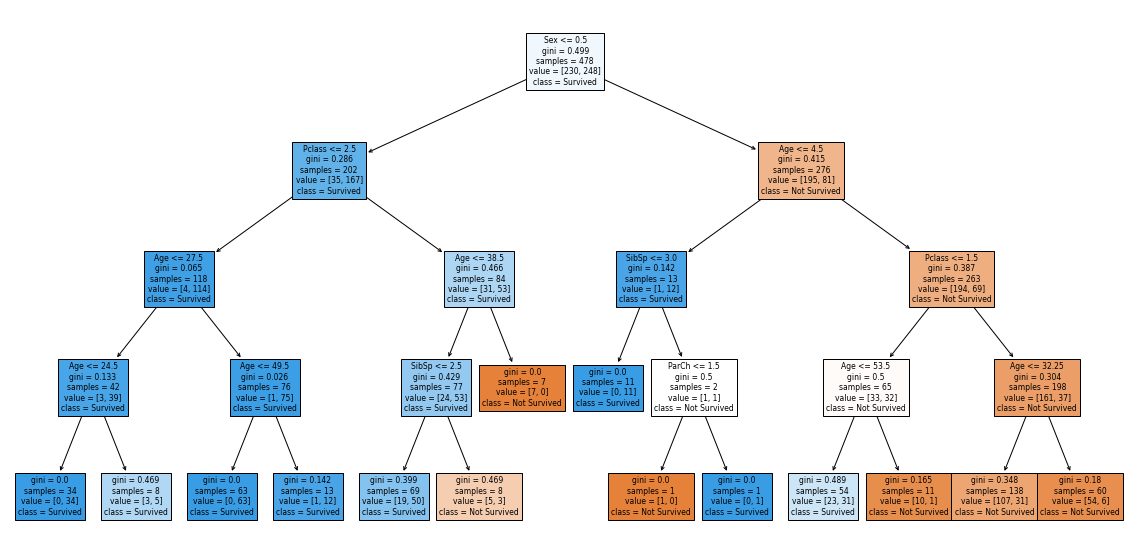

In [32]:
#Esta instrucción  grafica el árbol de decisión generado por el modelo best_clf
#después de haber sido entrenado con los datos especificados.
#Este gráfico muestra la estructura completa del árbol, incluyendo sus nodos y las ramificaciones.

plt.figure( figsize = (20,10) )

tree.plot_tree( best_clf,
                feature_names = X_train_titanic.columns, 
                class_names = ['Not Survived', 'Survived'],
                filled = True )  # Esto colorea los nodos para hacer más fácil la interpretación

plt.show()

In [33]:
#
feature_scores_titanic = pd.DataFrame( pd.Series( grid_search.best_estimator_.feature_importances_, 
                                                  index = X_train_titanic.columns).sort_values(ascending = False)).T


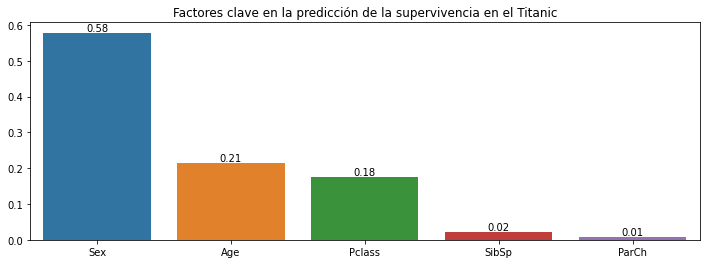

In [34]:
plt.figure(figsize=(12,4))
sns.barplot(data=feature_scores_titanic)

for index, value in enumerate(feature_scores_titanic.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("Factores clave en la predicción de la supervivencia en el Titanic")
plt.show()

* Para la clasificación del modelo en base a la variable target: Survived, los features más importantes son: Sex, seguido de Age y luego de Pclass.

* SibSp y ParCh no tienen un impacto significativo en la capacidad del modelo para predecir la variable objetivo, se podrían eliminar sin afectar la capacidad de predicción.

* Es importante destacar que se observa una performance parecida en la métrica de Accuracy para los datos de Train y de Test,


# 3. Introducción a Random Forest

**¿Qué es un bosque aleatorio o random forest?**

Random Forest es un ***algoritmo de aprendizaje automático*** de ***ensamble*** que combina múltiples árboles de decisión para producir una predicción más precisa y robusta.

Es una técnica popular y poderosa en el campo del machine learning para tareas de clasificación y regresión.

**¿Qué es un algoritmo de ensamble?**
El término "ensamble" se refiere a la idea de combinar múltiples modelos de aprendizaje para mejorar la precisión y la estabilidad. En el caso de Random Forest, cada modelo en el ensamble es un árbol de decisión, y el conjunto completo de árboles se llama bosque.


**¿Como se construye un bosque aleatorio?**



*   El proceso de construcción de un bosque aleatorio comienza seleccionando una muestra aleatoria de los datos de entrenamiento para cada árbol de decisión.
*    En cada árbol, se selecciona un subconjunto aleatorio de características de las muestras y se utiliza para entrenar el modelo.
 Esto se conoce como "muestreo de características" o "bagging".
Elemento de lista

*  La idea detrás del muestreo de características es reducir la correlación entre los árboles de decisión. Al seleccionar solo un subconjunto de características en cada árbol, se reduce la probabilidad de que los mismos predictores se utilicen en cada árbol y se mejora la capacidad del bosque para generalizar a nuevos datos.

*  Una vez que se han entrenado todos los árboles de decisión, se combina su salida para hacer una predicción final. En el caso de la clasificación, la predicción final es la clase que obtiene la mayoría de los votos de los árboles de decisión. En la regresión, la predicción final es el promedio de las predicciones de cada árbol.

Práctica: Random Forest

Utilizaremos el problema de diagnóstico de diabetes:
con el  dataset Pima indians diabetes de Kaggle: https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv

El conjunto de datos contiene información médica de mujeres Pima Indian de Arizona, Estados Unidos, que participaron en un estudio de la diabetes en la década de 1980.

El conjunto de datos consta de 768 instancias y 9 atributos, incluyendo el número de veces que una mujer ha estado embarazada, su edad, presión arterial diastólica, índice de masa corporal, concentración de glucosa en plasma y la presencia o ausencia de diabetes en la prueba.


**Variables/features presentes en la base de datos**
* preg: Número de veces embarazada
* plas: Concentración de glucosa en plasma a las 2 horas en una prueba de * tolerancia a la glucosa oral
* pres: Presión arterial diastólica (mm Hg)
* skin: Grosor del pliegue cutáneo tricipital (mm)
* test: Concentración de insulina en suero a las 2 horas (mu U/ml)
* mass: Índice de masa corporal (peso en kg/(altura en m)^2)
* pedi: Función de diabetes basada en antecedentes familiares
* age: Edad (años)
* class: Variable de clase (1: positivo para diabetes, 0: negativo para diabetes en la prueba)

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')

In [36]:
df_diabetes = pd.read_csv('diabetes.csv', header = None, sep = ',')
df_diabetes


,0,1,2,3,4,5,6,7,8
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


**Cargamos los datos**

In [37]:
#
df_diabetes = pd.read_csv('diabetes.csv', header = None, sep = ',')

df_columns = np.array(['preg','plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'Class'])

df_diabetes.columns = df_columns

df_diabetes.drop(df_diabetes.head(1).index, inplace = True)

df_diabetes.head()

,preg,plas,pres,skin,test,mass,pedi,age,Class
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [38]:
# Tipos de datos
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 1 to 768
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   preg    768 non-null    object
 1   plas    768 non-null    object
 2   pres    768 non-null    object
 3   skin    768 non-null    object
 4   test    768 non-null    object
 5   mass    768 non-null    object
 6   pedi    768 non-null    object
 7   age     768 non-null    object
 8   Class   768 non-null    object
dtypes: object(9)
memory usage: 54.1+ KB


In [39]:
# No hay datos duplicados en el dataset
df_diabetes.drop_duplicates(inplace = True)
df_diabetes

,preg,plas,pres,skin,test,mass,pedi,age,Class
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,10,101,76,48,180,32.9,0.171,63,0
765,2,122,70,27,0,36.8,0.34,27,0
766,5,121,72,23,112,26.2,0.245,30,0
767,1,126,60,0,0,30.1,0.349,47,1


In [40]:
#Variables con datos perdidos

df_diabetes.iloc[:, 1:6].replace( to_replace = [0], 
                                  value = np.nan ).isna().sum().reset_index( name = 'missing_values' ).rename(columns={"index": "variable"}).assign( percentage = lambda df_reset: df_reset.missing_values / len(df_diabetes) * 100)


,variable,missing_values,percentage
0,plas,0,0.0
1,pres,0,0.0
2,skin,0,0.0
3,test,0,0.0
4,mass,0,0.0


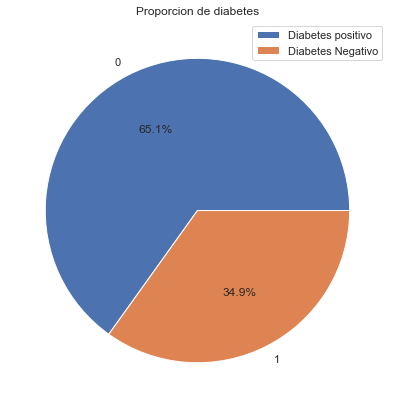

In [41]:
#Proporcion de la variable objetivo
plt.figure(figsize=(7,7))

labels, counts = np.unique(df_diabetes.Class, return_counts=True)
plt.pie(counts, autopct='%1.1f%%',labels=labels)
plt.legend({'Diabetes Negativo','Diabetes positivo'})
plt.title('Proporcion de diabetes')

plt.show()

In [42]:
#

print(df_diabetes.Class.value_counts())

Class
0    500
1    268
Name: count, dtype: int64


**Entrenamiento del modelo**

In [43]:
# Entrenamiento de random forest con scikit-learn
# Separamos en X e Y

X_diabetes = df_diabetes.drop('Class',axis=1)
y_diabetes = df_diabetes.Class

In [44]:
# Importamos las librerias para entrenamiento y testeo
from sklearn.model_selection import train_test_split
#Separamos nuestro conjunto de datos

X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split( X_diabetes,
                                                                                         y_diabetes, 
                                                                                         test_size = 0.20, 
                                                                                         random_state = 42 )

In [45]:
#Total de datos para entrenamiento
X_train_diabetes.shape, y_train_diabetes.shape

((614, 8), (614,))

In [46]:
# Bosque aleatorio
from sklearn.ensemble import RandomForestClassifier

# definimos nuestro modelo
rfc_diabetes = RandomForestClassifier(random_state = 42)

In [47]:
# Optimizacion de parametros
from sklearn.model_selection import GridSearchCV

# Definir los hiperparámetros y sus posibles valores
param_grid = {
    'n_estimators': [10,25,50],
    'max_depth' : [5,10,15],
    'criterion' : ['mse', 'mae', 'gini', 'entropy', 'log_loss'],
    'min_samples_split': [2,4,6],
    'min_samples_leaf': [1,2,4],
}

In [48]:
# Crear el objeto GridSearchCV
grid_search = GridSearchCV( estimator=rfc_diabetes, 
                            param_grid=param_grid, 
                            cv=5, scoring='accuracy')

In [49]:
# Ajustar el modelo con GridSearchCV
grid_search.fit(X_train_diabetes, y_train_diabetes)

# Obtener el modelo con el mejor rendimiento
best_model_diabetes = grid_search.best_estimator_

In [50]:
# Mejores parametros del modelo
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 50}

In [51]:
#
from sklearn.metrics import accuracy_score, classification_report
y_train_pred_diabetes = best_model_diabetes.predict(X_train_diabetes)
y_test_pred_diabetes = best_model_diabetes.predict(X_test_diabetes)

accuracy_train_diabetes = accuracy_score(y_train_diabetes,y_train_pred_diabetes)
accuracy_test_diabetes = accuracy_score(y_test_diabetes,y_test_pred_diabetes)

In [52]:
print(accuracy_train_diabetes)
print(accuracy_test_diabetes)

0.8501628664495114
0.7857142857142857


In [53]:
print(classification_report(y_test_diabetes, y_test_pred_diabetes))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        99
           1       0.73      0.64      0.68        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



El modelo de Random Forest, con parámetros optimizados, alcanzó una precisión general del 79% y un promedio ponderado del 76%.

El F1-score para la clase "0" fue de 84%, indicando una buena capacidad para identificar casos negativos. Sin embargo, el F1-score para la clase "1" fue de 68%, mostrando un rendimiento ligeramente inferior en la detección de casos positivos.



Análisis de las importancias de los features

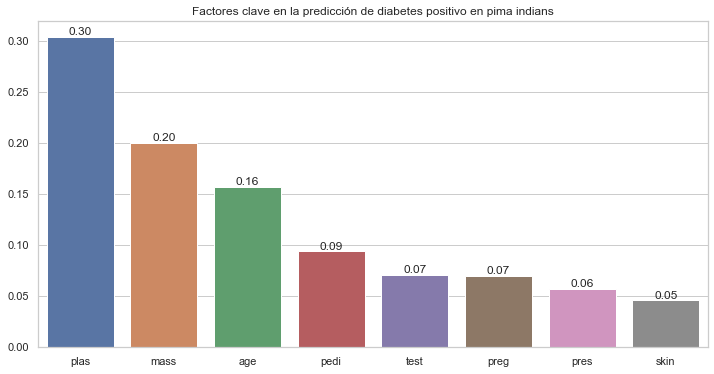

,0
plas,0.304330
mass,0.200533
age,0.157357
pedi,0.093927
test,0.070988
preg,0.069711
pres,0.057222
skin,0.045934


In [54]:
#
feature_scores_diabetes = pd.DataFrame(pd.Series(best_model_diabetes.feature_importances_, index=X_train_diabetes.columns).sort_values(ascending=False)).T
plt.figure(figsize=(12,6))
sns.barplot(data=feature_scores_diabetes)

for index, value in enumerate(feature_scores_diabetes.values.flatten()):
    plt.annotate(f'{value:.2f}', xy=(index, value), ha='center', va='bottom')


plt.title("Factores clave en la predicción de diabetes positivo en pima indians")
plt.show()
pd.DataFrame(feature_scores_diabetes).T

**Validación cruzada**

In [55]:
from sklearn.model_selection import cross_val_score, KFold

k = 5
cv = KFold(n_splits=k, shuffle=True, random_state=42)

scores = cross_val_score(best_model_diabetes, X_train_diabetes, y_train_diabetes, cv=cv, scoring='accuracy')
print("")
print("Accuracy scores for each fold:", scores*100)
print("Mean accuracy: ", scores.mean()*100)
print("Standard deviation: ", scores.std()*100)


Accuracy scores for each fold: [78.04878049 76.42276423 72.35772358 74.79674797 79.50819672]
Mean accuracy:  76.22684259629482
Standard deviation:  2.495611367618129


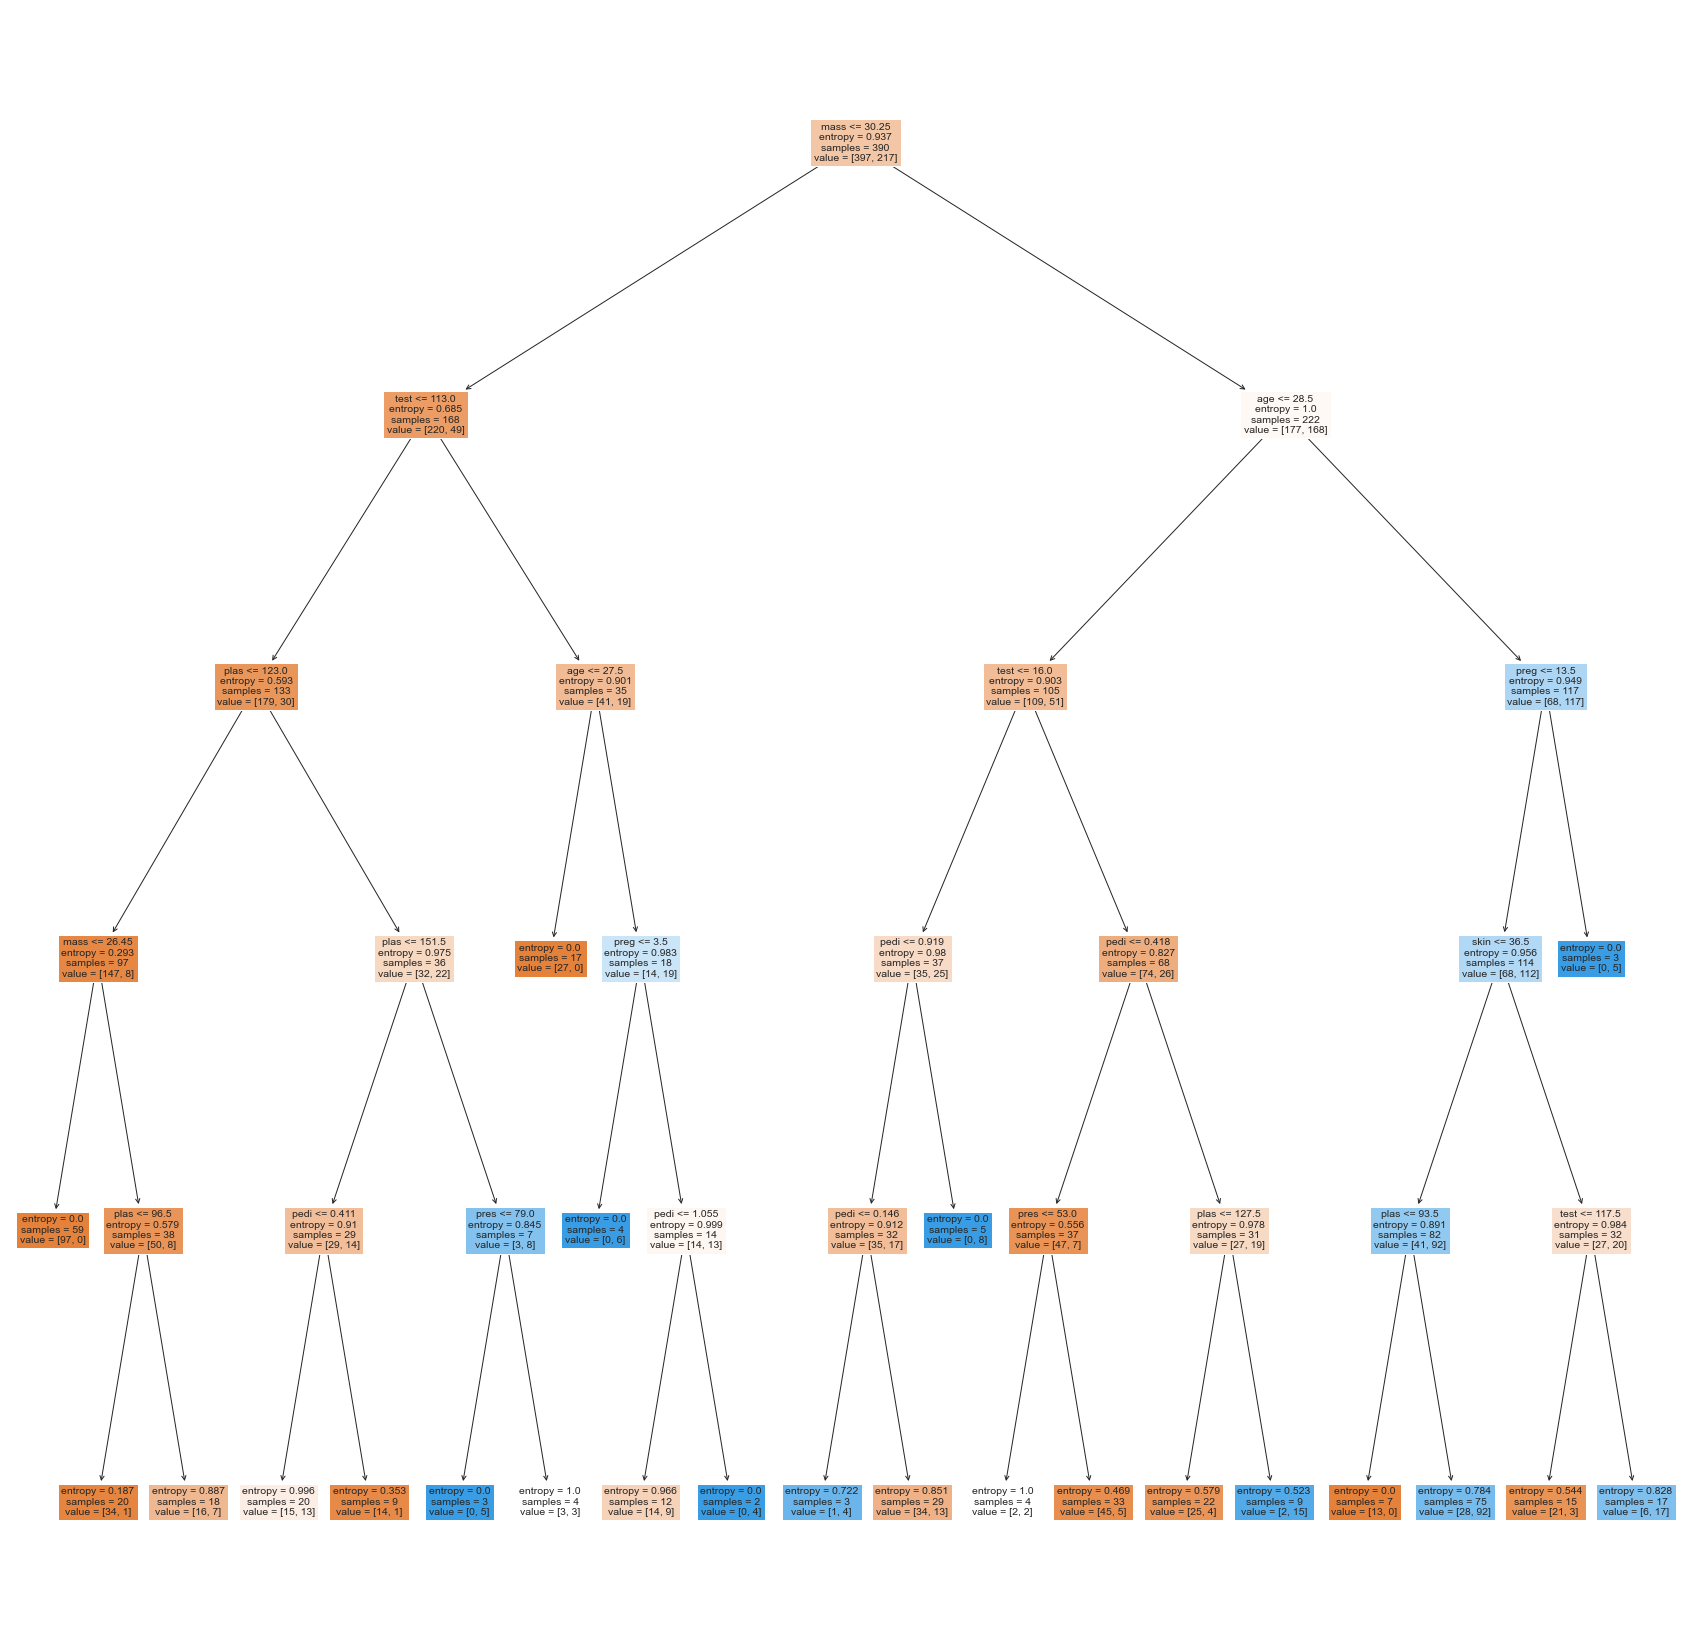

In [56]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(30, 30))

# Obtener un árbol aleatorio del Random Forest
tree_index = 0  # Índice del árbol deseado
Tree = best_model_diabetes.estimators_[tree_index]

# Visualizar el árbol utilizando plot_tree
tree.plot_tree(Tree, feature_names=X_train_diabetes.columns, filled=True)
plt.show()

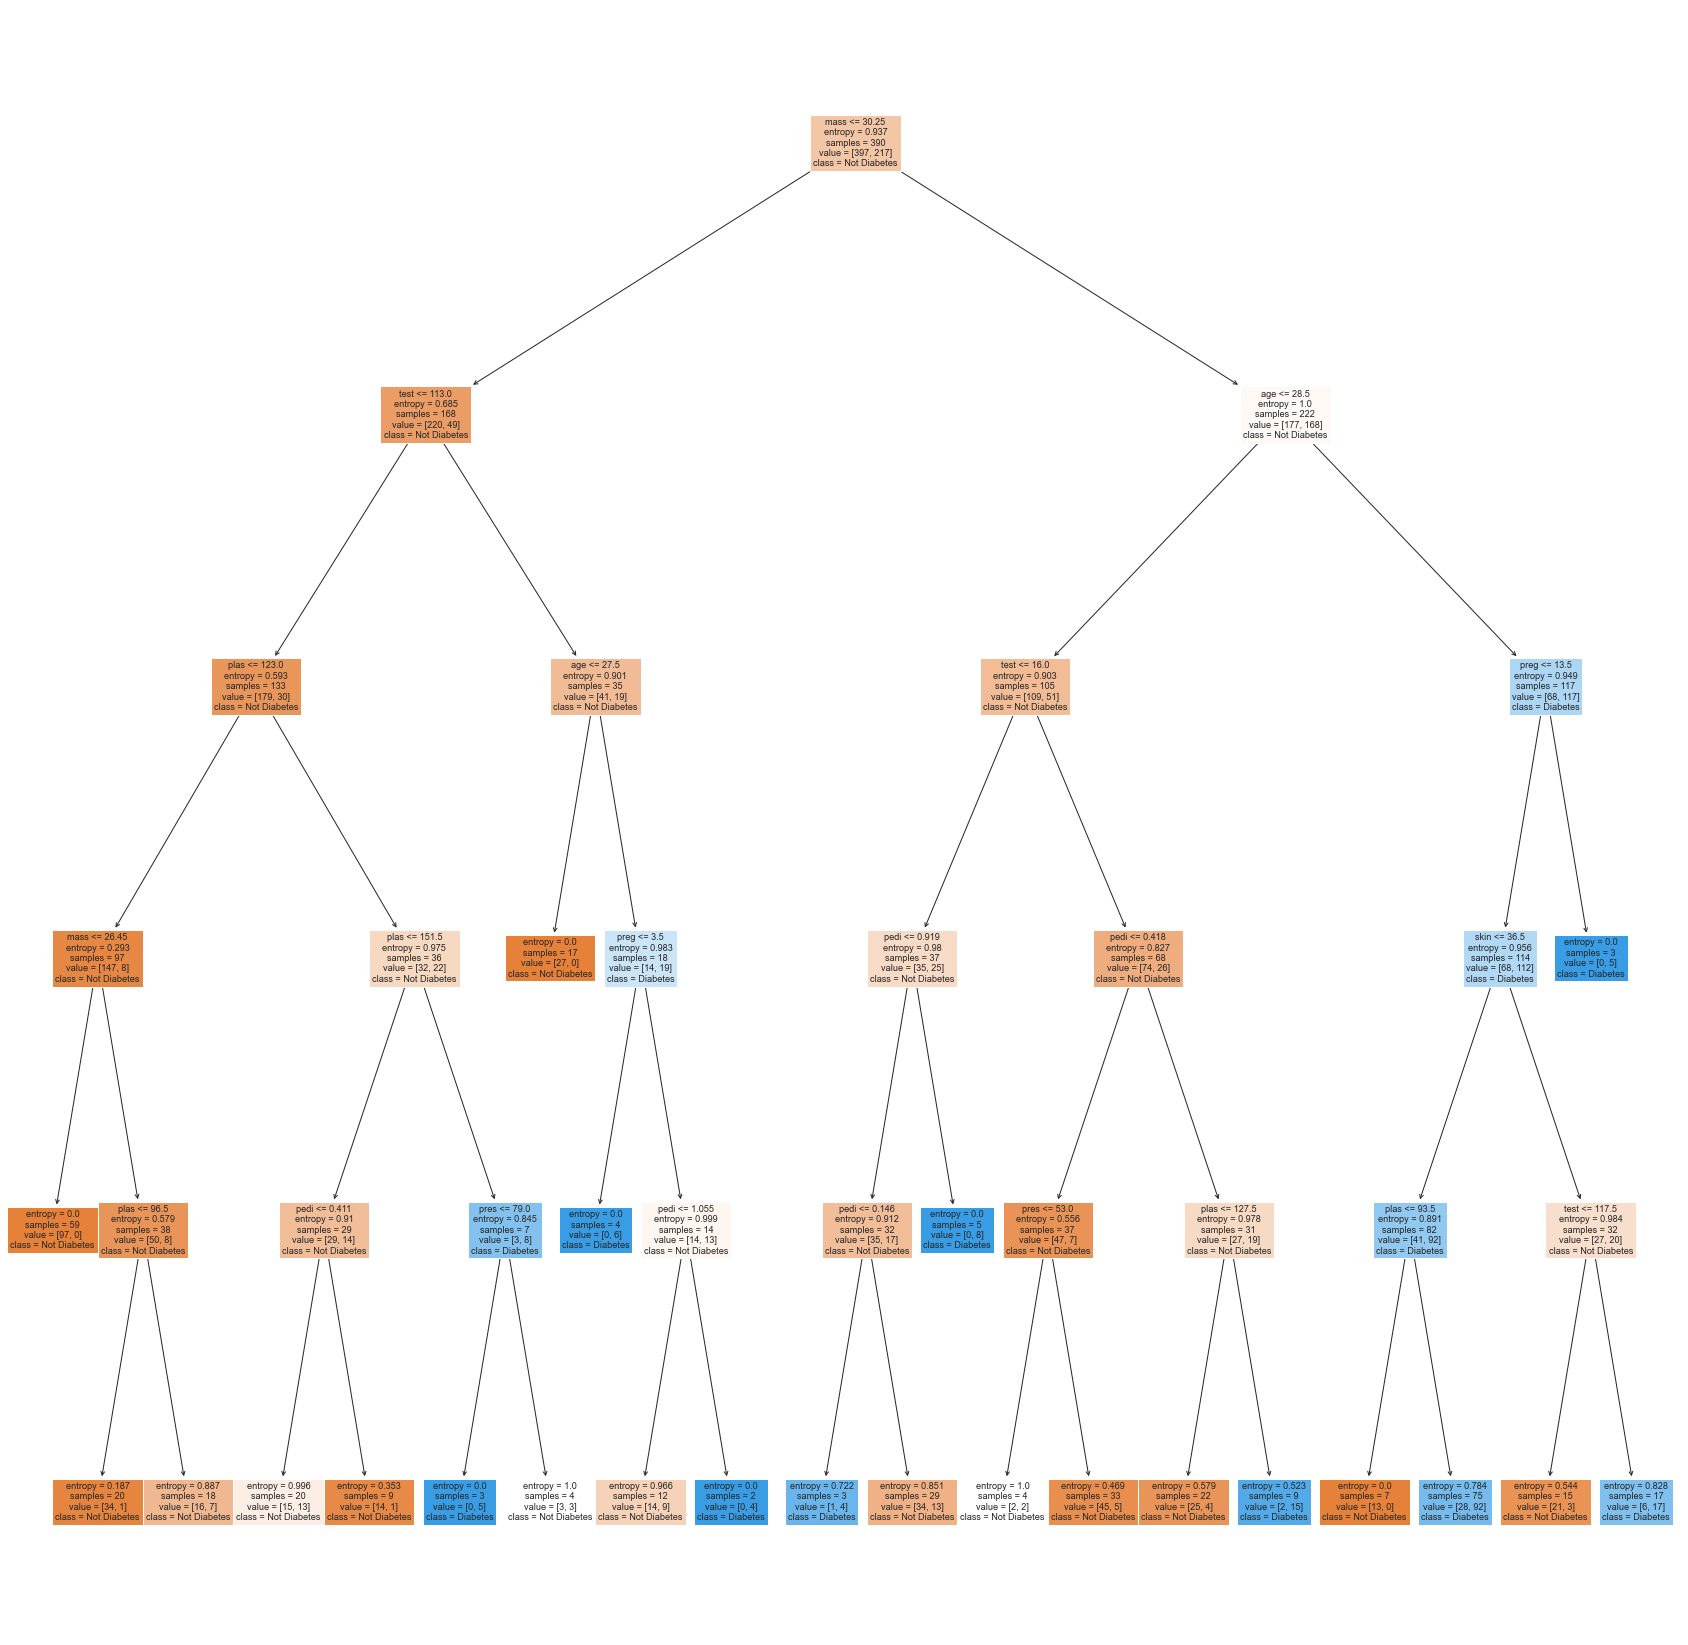

In [57]:
plt.figure(figsize=(30, 30))
tree.plot_tree(Tree,
               feature_names=X_train_diabetes.columns,  # 'X_train_titanic.columns' contiene los nombres de las características
               class_names=['Not Diabetes', 'Diabetes'],
               filled=True)  # Esto colorea los nodos para hacer más fácil la interpretación
plt.show()